In [1]:
import tensorflow as tf
import cupy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('./train.csv')

In [3]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
X=df.iloc[:,:-1]
X

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868


In [5]:
Y=df.iloc[:,-1:]
Y

,emission
0,3.750994
1,4.025176
2,4.231381
3,4.305286
4,4.347317
...,...
79018,29.404171
79019,29.186497
79020,29.131205
79021,28.125792


In [6]:
pd.DataFrame(X.isna().sum())

,0
ID_LAT_LON_YEAR_WEEK,0
latitude,0
longitude,0
year,0
week_no,0
...,...
Cloud_surface_albedo,484
Cloud_sensor_azimuth_angle,484
Cloud_sensor_zenith_angle,484
Cloud_solar_azimuth_angle,484


In [7]:
feature_index=np.array(X.isna().sum()) < (len(X)/2)
feature_index[0]=False
feature_index

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
X.loc[:,feature_index.get()]

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
79020,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868


In [9]:
X.fillna(0,inplace=True)

In [10]:
pd.DataFrame(X.isna().sum())

,0
ID_LAT_LON_YEAR_WEEK,0
latitude,0
longitude,0
year,0
week_no,0
...,...
Cloud_surface_albedo,0
Cloud_sensor_azimuth_angle,0
Cloud_sensor_zenith_angle,0
Cloud_solar_azimuth_angle,0


In [11]:
X.loc[:,feature_index.get()]

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,-0.510,29.290,2019,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
79020,-3.299,30.301,2021,50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868


In [12]:
X_train=np.array(X.loc[:,feature_index.get()])
Y_train=np.array(Y)

In [13]:
X_train.shape,Y_train.shape

((79023, 67), (79023, 1))

In [14]:
def initialize_parameters(n_x,n_h1,n_h2,n_o):
    W1=np.random.rand(n_h1,n_x)*0.01
    b1=np.zeros((n_h1,1))
    W2=np.random.rand(n_h2,n_h1)*0.01
    b2=np.zeros((n_h2,1))
    W3=np.random.rand(n_o,n_h2)*0.01
    b3=np.zeros((n_o,1))

    parameters={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }

    return parameters

In [15]:
def relu(Z):
    A=(Z>=0).astype(int)*Z
    return A

In [16]:
def diff_relu(Z):
    A=(Z>=0).astype(int)
    return A

In [17]:
def forward_propagation(parameters,X):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']

    Z1=np.matmul(W1,X)+b1
    A1=relu(Z1)
    Z2=np.matmul(W2,A1)+b2
    A2=relu(Z2)
    Z3=np.matmul(W3,A2)+b3

    cache={
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2,
        'Z3':Z3
    }

    return Z3,cache

In [18]:
def compute_cost(Z3,Y):
    m=Z3.shape[1]
    cost=1/m*np.sum(np.power(Z3-Y,2))
    return cost

In [19]:
def backpropagation(parameters,cache,X,Y,lambda_):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    W3=parameters['W3']
    b3=parameters['b3']

    Z1=cache['Z1']
    A1=cache['A1']
    Z2=cache['Z2']
    A2=cache['A2']
    Z3=cache['Z3']

    m=X.shape[1]

    dZ3=Z3-Y
    dW3=1/m*(np.matmul(dZ3,A2.T) + lambda_*W3)
    db3=1/m*np.sum(dZ3,axis=1,keepdims=True)
    dZ2=np.matmul(W3.T,dZ3)*diff_relu(Z2)
    dW2=1/m*(np.matmul(dZ2,A1.T) + lambda_*W2)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.matmul(W2.T,dZ2)*diff_relu(Z1)
    dW1=1/m*(np.matmul(dZ1,X.T) + lambda_*W1)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)

    grads={
        'dW3':dW3,
        'db3':db3,
        'dW2':dW2,
        'db2':db2,
        'dW1':dW1,
        'db1':db1
    }

    return grads


In [20]:
def update_parameters(grads,parameters,learning_rate=0.01):
    W1=copy.deepcopy(parameters['W1'])
    b1=parameters['b1']
    W2=copy.deepcopy(parameters['W2'])
    b2=parameters['b2']
    W3=copy.deepcopy(parameters['W3'])
    b3=parameters['b3']

    dW3=grads['dW3']
    db3=grads['db3']
    dW2=grads['dW2']
    db2=grads['db2']
    dW1=grads['dW1']
    db1=grads['db1']

    W3-=learning_rate*dW3
    b3-=learning_rate*db3
    W2-=learning_rate*dW2
    b2-=learning_rate*db2
    W1-=learning_rate*dW1
    b1-=learning_rate*db1

    params={
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }
    
    return params

In [21]:
def gradient_descent(X,Y,n_h1,n_h2,num_iters=10000,learning_rate=0.01,lambda_=0.01):
    cost_list=[]

    print('Training Started...')
    np.random.seed(1)
    parameters=initialize_parameters(X.shape[0],n_h1,n_h2,Y.shape[0])

    for i in range(num_iters):
        Z3,cache=forward_propagation(parameters,X)
        cost=compute_cost(Z3,Y)
        grads=backpropagation(parameters,cache,X,Y,lambda_)
        parameters=update_parameters(grads,parameters,learning_rate)

        if(i%100==0):
            print(f'Cost until {i} iterations:\t{float(cost)}')
        cost_list.append(float(cost))

    prediction,_=forward_propagation(parameters,X)
    score=compute_cost(prediction,Y)
    print(f'Final cost: {score}')

    return parameters,cost_list

In [22]:
X_train_tr,X_test,Y_train_tr,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=1)

In [23]:
scaler=StandardScaler()
scaler.fit(X_train_tr.get())
X_train_scaled=np.array(scaler.transform(X_train_tr.get()).T)
X_test_scaled=np.array(scaler.transform(X_test.get()).T)

In [24]:
Y_train_tr=Y_train_tr.T
Y_test=Y_test.T

In [25]:
X_train_scaled.shape,Y_train_tr.shape

((67, 55316), (1, 55316))

In [26]:
X_test_scaled.shape,Y_test.shape

((67, 23707), (1, 23707))

In [27]:
parameters,cost_list=gradient_descent(X_train_scaled,Y_train_tr,64,32,1000,0.01,0.001)

Training Started...
Cost until 0 iterations:	28678.594815631353
Cost until 100 iterations:	22848.13440488739
Cost until 200 iterations:	22046.924385737148
Cost until 300 iterations:	21939.578527878457
Cost until 400 iterations:	21925.1963647452
Cost until 500 iterations:	21923.26944720485
Cost until 600 iterations:	21923.011279419323
Cost until 700 iterations:	21922.976690183354
Cost until 800 iterations:	21922.972055928767
Cost until 900 iterations:	21922.97143503284
Final cost: 21922.971351845412


In [28]:
prediction_test,_=forward_propagation(parameters,X_test_scaled)
prediction_test.shape

(1, 23707)

In [29]:
cost_test=compute_cost(prediction_test,Y_test)
cost_test

array(18253.70761612)

In [30]:
import matplotlib.pyplot as plt

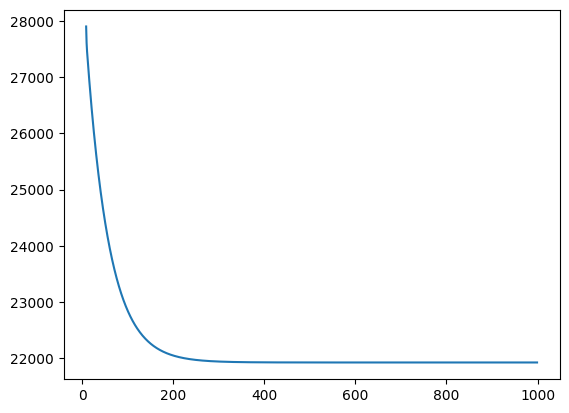

In [37]:
plt.plot(range(9,1000),cost_list[9:])

In [32]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=1,activation='linear',kernel_regularizer=tf.keras.regularizers.L2(0.01)),
])

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.0001)
)

In [33]:
model.fit(X_train_scaled.T.get(),Y_train_tr.T.get(),epochs=10)

Epoch 1/10
1729/1729 [==============================] - 14s 8ms/step - loss: 25555.8184
Epoch 2/10
1729/1729 [==============================] - 13s 8ms/step - loss: 21997.4258
Epoch 3/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21792.5762
Epoch 4/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21694.6719
Epoch 5/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21624.3574
Epoch 6/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21571.2070
Epoch 7/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21529.2246
Epoch 8/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21496.9727
Epoch 9/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21470.2461
Epoch 10/10
1729/1729 [==============================] - 12s 7ms/step - loss: 21445.5273


In [34]:
model.evaluate(X_test_scaled.T.get(),Y_test.T.get())

741/741 [==============================] - 4s 4ms/step - loss: 17802.9570


17802.95703125